In part 2 of the assignment, we switch from text processing to image processing to explore
another set of model tasks. Again, you are asked to follow a set of instructions below and report
on your findings.
For this assignment we will make use of the CIFAR-100 dataset of images. Rather than using all
images, you are asked to randomly split CIFAR into two subsets of 50 classes each. Your first
task is to make these subsets and save these subsets to disk for use later. Make sure to randomly
select these classes (don’t just take the first 50). Also make sure to account for training, validation,
or test as appropriate. We will refer to the first set of data as Block 1 and the second set of 50
classes as Block 2.
As with Part 1, the set of tasks below do not build on each other and can in some ways be
considered independent.

In [21]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import models, layers
from tensorflow.keras.layers import LeakyReLU, Rescaling, Dense, Reshape, Flatten, Input, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

np.random.seed(42) 

In [22]:
number_epochs = 50
num_classes = 50

Block 1 train shape: (20000, 32, 32, 3), Block 1 val shape: (5000, 32, 32, 3), Block 1 test shape: (5000, 32, 32, 3)
Block 2 train shape: (20000, 32, 32, 3), Block 2 test shape: (5000, 32, 32, 3)


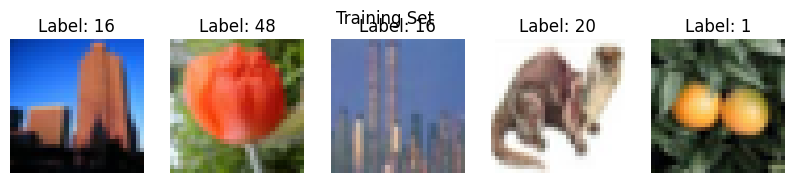

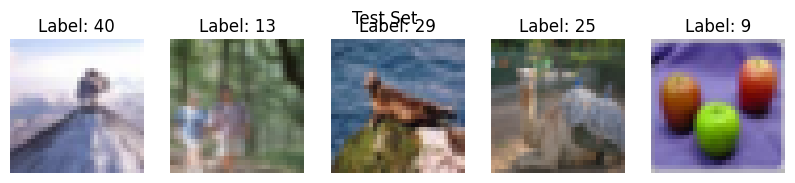

In [23]:
# Load the data from the .npz file
block1 = np.load("block1_data.npz")
# Load the data from the .npz file
block2 = np.load("block2_data.npz")


# Access the arrays within the .npz file
# Example: Assuming the file contains arrays named 'x_train', 'y_train', etc.
x_train_block1 = block1['x_train']
y_train_block1 = block1['y_train']
x_val_block1 = block1['x_val']
y_val_block1 = block1['y_val']
x_test_block1 = block1['x_test']
y_test_block1 = block1['y_test']

x_train_block2 = block2['x_train']
y_train_block2 = block1['y_train']
x_test_block2 = block2['x_test']
y_test_block2 = block1['y_test']
x_val_block2 = block1['x_val']
y_val_block2 = block1['y_val']


y_train_block1_one_hot = to_categorical(y_train_block1, num_classes=num_classes)
y_val_block1_one_hot = to_categorical(y_val_block1, num_classes=num_classes)
y_test_block1_one_hot = to_categorical(y_test_block1, num_classes=num_classes)

# Check the shapes of the datasets
print(f'Block 1 train shape: {x_train_block1.shape}, Block 1 val shape: {x_val_block1.shape}, Block 1 test shape: {x_test_block1.shape}')
print(f'Block 2 train shape: {x_train_block2.shape}, Block 2 test shape: {x_test_block2.shape}')


# Function to plot images
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i][0]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Plot 5 images from the training set
plot_images(x_train_block1, y_train_block1, "Training Set")

# Plot 5 images from the test set
plot_images(x_test_block1, y_test_block1, "Test Set")

In [24]:
# Basic Network Model
def build_model_softmax(input_shape=(32, 32, 3), num_classes=50):
    model = models.Sequential([
        Rescaling(1.0 / 255.0, input_shape=input_shape),  # Normalize the input
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',  # Sparse Categorical Crossentropy for integer labels
                  metrics=['accuracy'])
    return model

def build_model_softmax_activations_tanh(input_shape=(32, 32, 3), num_classes=50):
    model = models.Sequential([
        Rescaling(1.0 / 255.0, input_shape=input_shape),  # Normalize the input
        layers.Flatten(),
        layers.Dense(512, activation='tanh'),
        layers.Dense(256, activation='tanh'),
        layers.Dense(128, activation='tanh'),
        layers.Dense(64, activation='tanh'),
        layers.Dense(32, activation='tanh'),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',  # Sparse Categorical Crossentropy for integer labels
                  metrics=['accuracy'])
    return model

# Basic Network Model with LeakyReLU    
def build_model_with_activations_leakyReLU(input_shape=(32, 32, 3), num_classes=50):
    model = models.Sequential([
        Rescaling(1.0 / 255.0, input_shape=input_shape),  # Normalize the input
        layers.Flatten(),        
        layers.Dense(512),
        LeakyReLU(), 
        layers.Dense(256),
        LeakyReLU(), 
        layers.Dense(128),
        LeakyReLU(),
        layers.Dense(64),
        LeakyReLU(),
        layers.Dense(32),
        LeakyReLU(),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Basic Network Model with LeakyReLU    
def build_model_with_activations_leakyReLU_cc(input_shape=(32, 32, 3), num_classes=50):
    model = models.Sequential([
        Rescaling(1.0 / 255.0, input_shape=input_shape),  # Normalize the input
        layers.Flatten(),        
        layers.Dense(512),
        LeakyReLU(), 
        layers.Dense(256),
        LeakyReLU(), 
        layers.Dense(128),
        LeakyReLU(),
        layers.Dense(64),
        LeakyReLU(),
        layers.Dense(32),
        LeakyReLU(),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# List of model build functions and their names
models_to_test = [
    (build_model_softmax, "softmax_sparse_categorical_relu", False),
    (build_model_with_activations_leakyReLU, "softmax_sparse_categorical_leakyReLU", False),
    (build_model_softmax_activations_tanh, "softmax_sparse_categorical_tanh", False),
    (build_model_with_activations_leakyReLU_cc, "softmax_categorical_crossentropy", True)
]

# Initialize an empty list to store the results
results = []

# Loop through all models
for build_model_fn, model_name, encoding in models_to_test:
    print(f"Training model: {model_name}")
    
    # Build and train the model
    model = build_model_fn()
    model.summary()

    # Define the checkpoint callback dynamically using lambda to include the model name
    checkpoint_path = f'part_2/best_model_{model_name}.keras'
    checkpoint = ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )  

    # Define early stopping and model checkpoint
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    if encoding:
        # Train the model using one-hot encoded labels
        history_model = model.fit(
            x_train_block1, 
            y_train_block1_one_hot, 
            epochs=number_epochs, 
            validation_data=(x_val_block1, y_val_block1_one_hot), 
            callbacks=[early_stopping, checkpoint]
        )
    else:
        # Train the model using integer labels
        history_model = model.fit(
            x_train_block1, 
            y_train_block1, 
            epochs=number_epochs, 
            validation_data=(x_val_block1, y_val_block1), 
            callbacks=[early_stopping, checkpoint]
        )

    
    # Load the best model saved during training
    best_model = load_model(f'part_2/best_model_{model_name}.keras')

    # Evaluate the model
    if encoding:
        test_loss, test_accuracy = best_model.evaluate(x_test_block1, y_test_block1_one_hot)
    else:
        test_loss, test_accuracy = best_model.evaluate(x_test_block1, y_test_block1)

    # Evaluate the model on the test data (Block 1)
    # test_loss, test_acc = best_model.evaluate(x_test_block1, y_test_block1)
    
    # Store the results in the list
    results.append({
        'model_name': model_name,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'model_history': history_model,
        'model': best_model
    })
    
    print(f"Test Loss ({model_name}): {test_loss}")
    print(f"Test Accuracy ({model_name}): {test_accuracy}")
    print("-" * 50)


Training model: softmax_sparse_categorical_relu


/Users/johan.pieterse/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 50)             │         1,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,586 (6.67 MB)

 Trainable params: 1,749,586 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0449 - loss: 3.7816
Epoch 1: val_loss improved from inf to 3.51280, saving model to part_2/best_model_softmax_sparse_categorical_relu.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0451 - loss: 3.7804 - val_accuracy: 0.0894 - val_loss: 3.5128
Epoch 2/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1024 - loss: 3.4051
Epoch 2: val_loss improved from 3.51280 to 3.36566, saving model to part_2/best_model_softmax_sparse_categorical_relu.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1024 - loss: 3.4050 - val_accuracy: 0.1062 - val_loss: 3.3657
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1267 - loss: 3.2979
Epoch 3: val_loss improved from 3.36566 to 3.28916, saving model to part_2/best_model_softmax_sparse_categorical_relu.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1267 - loss: 3.2979 - val_accuracy: 0.1274 - val_loss: 3.2892
Epoch 4/50
625/62

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 50)             │         1,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,586 (6.67 MB)

 Trainable params: 1,749,586 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0556 - loss: 3.7809
Epoch 1: val_loss improved from inf to 3.36586, saving model to part_2/best_model_softmax_sparse_categorical_leakyReLU.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0556 - loss: 3.7806 - val_accuracy: 0.1228 - val_loss: 3.3659
Epoch 2/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1246 - loss: 3.3284
Epoch 2: val_loss improved from 3.36586 to 3.33219, saving model to part_2/best_model_softmax_sparse_categorical_leakyReLU.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1246 - loss: 3.3283 - val_accuracy: 0.1294 - val_loss: 3.3322
Epoch 3/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1555 - loss: 3.1959
Epoch 3: val_loss improved from 3.33219 to 3.22617, saving model to part_2/best_model_softmax_sparse_categorical_leakyReLU.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1555 - loss: 3.1958 - val_accuracy: 0.1634 - val_loss: 3.2262
Epoch 4/

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 50)             │         1,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,586 (6.67 MB)

 Trainable params: 1,749,586 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0198 - loss: 3.9415
Epoch 1: val_loss improved from inf to 3.74905, saving model to part_2/best_model_softmax_sparse_categorical_tanh.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0198 - loss: 3.9412 - val_accuracy: 0.0342 - val_loss: 3.7491
Epoch 2/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0426 - loss: 3.7220
Epoch 2: val_loss improved from 3.74905 to 3.61710, saving model to part_2/best_model_softmax_sparse_categorical_tanh.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0427 - loss: 3.7218 - val_accuracy: 0.0578 - val_loss: 3.6171
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0520 - loss: 3.6457
Epoch 3: val_loss did not improve from 3.61710
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0520 - loss: 3.6457 - val_accuracy: 0.0474 - val_loss: 3.6311
Epoch 4/50
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0579 - loss: 3.6178
Epoch 4: val_l

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 50)             │         1,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,586 (6.67 MB)

 Trainable params: 1,749,586 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0551 - loss: 3.7839
Epoch 1: val_loss improved from inf to 3.40909, saving model to part_2/best_model_softmax_categorical_crossentropy.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0553 - loss: 3.7827 - val_accuracy: 0.1122 - val_loss: 3.4091
Epoch 2/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1160 - loss: 3.3665
Epoch 2: val_loss improved from 3.40909 to 3.27471, saving model to part_2/best_model_softmax_categorical_crossentropy.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1161 - loss: 3.3663 - val_accuracy: 0.1480 - val_loss: 3.2747
Epoch 3/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1593 - loss: 3.1773
Epoch 3: val_loss improved from 3.27471 to 3.15654, saving model to part_2/best_model_softmax_categorical_crossentropy.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1593 - loss: 3.1773 - val_accuracy: 0.1704 - val_loss: 3.1565
Epoch 4/50
621/625 ━

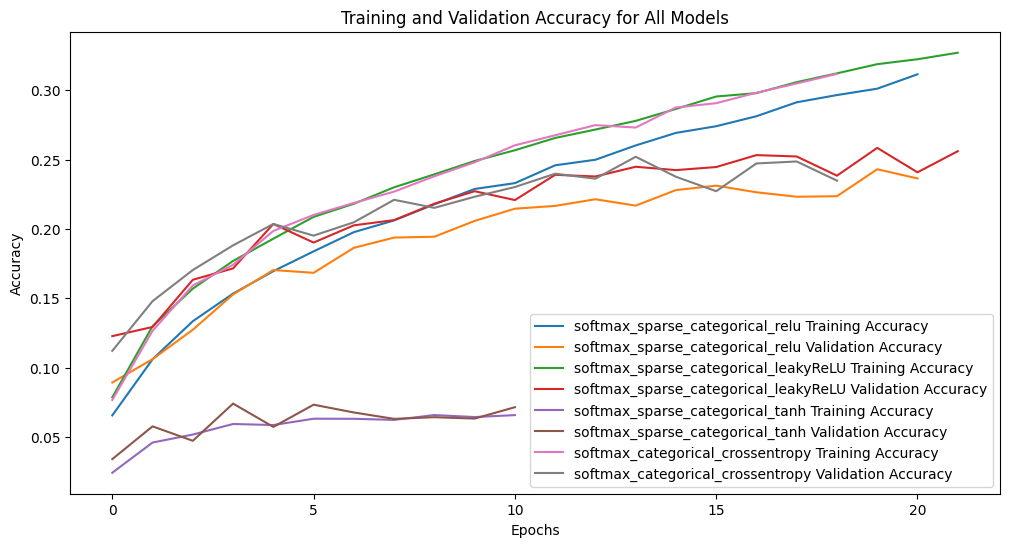

In [25]:
results_df = pd.DataFrame(results)

# Plot training and validation accuracy for the models (using the available history)
plt.figure(figsize=(12, 6))

# Loop through each row in the results DataFrame and plot the test accuracy
for index, row in results_df.iterrows():
    model_name = row['model_name']
    model_history = row['model_history']
    
    plt.plot(model_history.history['accuracy'], label=f'{model_name} Training Accuracy')
    plt.plot(model_history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')

# Add labels, title, and legend
plt.title('Training and Validation Accuracy for All Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

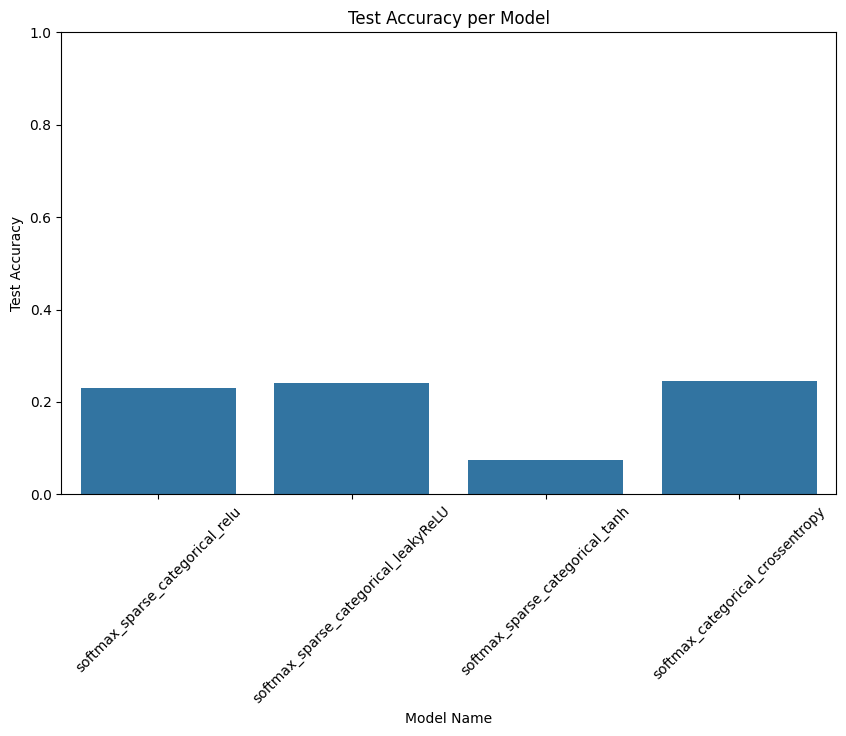

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df is your DataFrame with columns 'model_name' and 'test_accuracy'

# Extract the relevant data
model_names = results_df['model_name']
test_accuracies = results_df['test_accuracy']

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'model_name': model_names,
    'test_accuracy': test_accuracies
})

# Plot test_accuracy per model_name
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='test_accuracy', data=plot_df)
plt.title('Test Accuracy per Model')
plt.xlabel('Model Name')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [27]:
# # Normalize the images between 0 and 1
x_train_block1_norm = x_train_block1.astype('float32') / 255.0
x_val_block1_norm = x_val_block1.astype('float32') / 255.0
x_test_block1_norm = x_test_block1.astype('float32') / 255.0

In [28]:
row = results_df.loc[results_df['model_name'] == 'softmax_sparse_categorical_leakyReLU']
base_model_auto_input= row['model'].values[0]

# Define the Autoencoder Model
def build_autoencoder(input_shape=(32, 32, 3), latent_dim=50):
    # Encoder
    input_img = layers.Input(shape=input_shape)
    x = layers.Flatten()(input_img)  # Flatten the image
    x = layers.Dense(512)(x)  # Reduce dimensionality
    x = layers.LeakyReLU()(x)  # Use LeakyReLU for better gradient flow
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(128)(x)
    x = layers.LeakyReLU()(x)
    
    # Latent space (bottleneck)
    latent_space = layers.Dense(latent_dim)(x)  # Compressed representation
    
    # Decoder
    x = layers.Dense(128)(latent_space)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dense(np.prod(input_shape), activation='sigmoid')(x)  # Output layer with sigmoid for [0, 1] range
    
    # Reshape to the original image size
    decoded_img = layers.Reshape(input_shape)(x)
    
    # Autoencoder model
    autoencoder = models.Model(input_img, decoded_img)
    
    # Compile the model with a smaller learning rate
    autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
    
    return autoencoder


# Build the Autoencoder
autoencoder = build_autoencoder(input_shape=(32, 32, 3), latent_dim=50)

# Summary of the model
autoencoder.summary()

# Define early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('part_2/best_autoencoder.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the Autoencoder
history_autoencoder = autoencoder.fit(
    x_train_block1_norm, 
    x_train_block1_norm,  # Autoencoders train on the input data itself (input == output)
    epochs=number_epochs, 
    validation_data=(x_val_block1_norm, x_val_block1_norm),
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the autoencoder on test data
test_loss_autoencoder = autoencoder.evaluate(x_test_block1_norm, x_test_block1_norm)

print(f'Test Loss (Autoencoder): {test_loss_autoencoder}')

Model: "functional_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 3072)           │     1,575,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,491,122 (13.32 MB)

 Trainable params: 3,491,122 (13.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0512
Epoch 1: val_loss improved from inf to 0.03069, saving model to part_2/best_autoencoder.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0512 - val_loss: 0.0307
Epoch 2/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0267
Epoch 2: val_loss improved from 0.03069 to 0.02131, saving model to part_2/best_autoencoder.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0267 - val_loss: 0.0213
Epoch 3/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0206
Epoch 3: val_loss improved from 0.02131 to 0.01938, saving model to part_2/best_autoencoder.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0206 - val_loss: 0.0194
Epoch 4/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0190
Epoch 4: val_loss improved from 0.01938 to 0.01883, saving model to part_2/best_autoencoder.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0190 - val_loss: 0.0188
Epoch 5/50
624/625 ━━━━━━━━━━━━━━━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


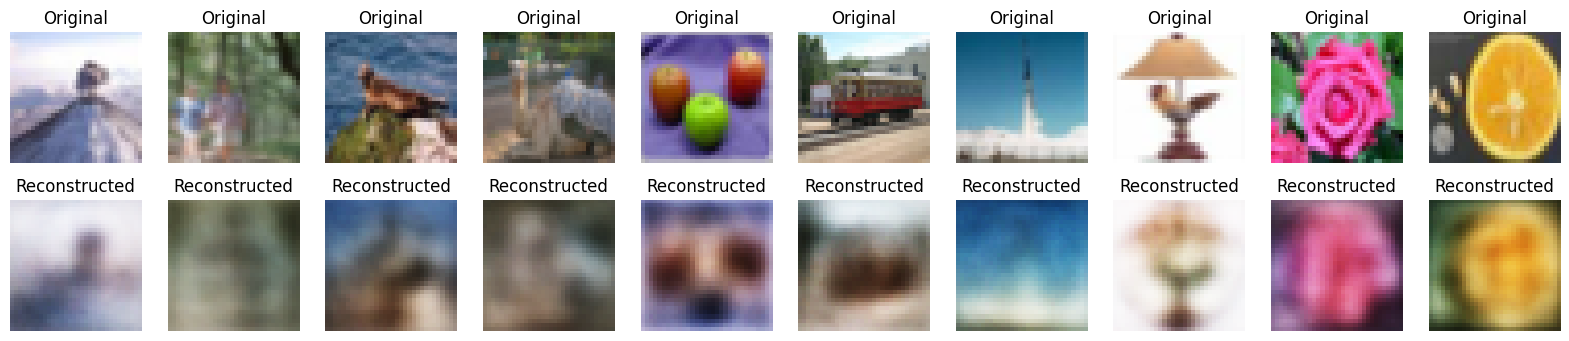

In [29]:
# Load the best model saved during training
best_autoencoder = load_model('part_2/best_autoencoder.keras')

results_df

# Get the reconstructed images from the autoencoder
reconstructed_images = best_autoencoder.predict(x_test_block1_norm)

# Plot original vs. reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_block1_norm[i])
    plt.gray()
    ax.set_title("Original")
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.gray()
    ax.set_title("Reconstructed")
    ax.axis('off')  

plt.show()


In [31]:
# Assuming `results_df` contains the base model in `row['model']`
row = results_df.loc[results_df['model_name'] == 'softmax_sparse_categorical_leakyReLU']
base_model_test = row['model'].values[0]

# Freeze the entire model to avoid updating weights during training
base_model_test.trainable = False

# Reuse all layers except the last one
reuse_layers = base_model_test.layers[0:-1]

# Define new layers to add after the reused layers
new_layers = [
    layers.Dense(64, activation='relu'),  # New custom layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
]

# Create the new transfer model by combining reused layers and new layers
transfer_model = models.Sequential(reuse_layers + new_layers, name='transfer_model')

checkpoint = ModelCheckpoint('part_2/best_transfer_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Compile the model for training
transfer_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the transfer model to check the structure
transfer_model.summary()

# Train the model on Block 2 data (only the new layers will be trained)
history_transfer_model = transfer_model.fit(x_train_block2, y_train_block2, 
                                             epochs=number_epochs, 
                                             validation_data=(x_val_block2, y_val_block2),
                                             batch_size=32, 
                                             callbacks=[checkpoint])

# Evaluate the model on Block 2 test data
test_loss, test_accuracy = transfer_model.evaluate(x_test_block2, y_test_block2)

# Print the test results
print(f"Test Loss (Transfer Learning on Block 1): {test_loss}")
print(f"Test Accuracy (Transfer Learning on Block 1): {test_accuracy}")


Model: "transfer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (32, 32, 32, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 3072)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (32, 512)              │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (32, 256)              │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,747,936 (6.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,747,936 (6.67 MB)

Epoch 1/50
603/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0201 - loss: 5.0325
Epoch 1: val_loss improved from inf to 4.69738, saving model to part_2/best_transfer_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0200 - loss: 5.0220 - val_accuracy: 0.0146 - val_loss: 4.6974
Epoch 2/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0209 - loss: 4.3448
Epoch 2: val_loss improved from 4.69738 to 4.43468, saving model to part_2/best_transfer_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0209 - loss: 4.3441 - val_accuracy: 0.0160 - val_loss: 4.4347
Epoch 3/50
612/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0204 - loss: 4.1798
Epoch 3: val_loss improved from 4.43468 to 4.30487, saving model to part_2/best_transfer_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0204 - loss: 4.1792 - val_accuracy: 0.0158 - val_loss: 4.3049
Epoch 4/50
604/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0228 - loss: 4.0945
Epoch 

In [52]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model
import numpy as np

# Assuming base_model_test is already loaded from the results_df as the pre-trained model
row = results_df.loc[results_df['model_name'] == 'softmax_sparse_categorical_relu']
base_model_test = row['model'].values[0]

# Define the custom decoder function
def create_decoder(latent_dim=50,
                   activation='relu',
                   final_activation='sigmoid',
                   output_shape=(32, 32, 3)):
    # Input latent representation
    latent_inputs = Input(shape=(latent_dim,))
    # First hidden layer
    dense_one = Dense(32, activation=activation)(latent_inputs)
    # Second hidden layer
    dense_two = Dense(64, activation=activation)(dense_one)
    # Third hidden layer
    dense_three = Dense(128, activation=activation)(dense_two)
    # Fourth hidden layer
    dense_four = Dense(256, activation=activation)(dense_three)
    # Fifth hidden layer
    dense_five = Dense(512, activation=activation)(dense_four)
    # Output layer (reshaping back to original input shape)
    output_layer = Dense(output_shape[0] * output_shape[1] * output_shape[2],
                         activation=final_activation)(dense_five)
    outputs = Reshape(output_shape)(output_layer)
    decoder = Model(latent_inputs, outputs)
    return decoder

# Define the Autoencoder Model
def build_autoencoder(input_shape=(32, 32, 3), latent_dim=50):
    # Encoder: Use the pre-trained base model directly (without the final classification layer)
    encoder_input = layers.Input(shape=input_shape)  # Define the input layer for the encoder
    encoder_output = base_model_test(encoder_input)  # Apply the base model to the input
    
    # Add latent space (bottleneck layer)
    latent_space = layers.Dense(latent_dim)(encoder_output)  # Compressed representation
    
    # Create the decoder
    decoder = create_decoder(latent_dim=latent_dim, activation='relu', final_activation='sigmoid', output_shape=input_shape)
    
    # Autoencoder model (encoder + decoder)
    autoencoder = models.Model(encoder_input, decoder(latent_space))
    
    # Compile the model with MSE loss for autoencoder
    autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')  # Use MSE for autoencoder
    
    return autoencoder

# Build the Autoencoder with pre-trained encoder and custom decoder
autoencoder = build_autoencoder(input_shape=(32, 32, 3), latent_dim=50)

# Summary of the model to check the structure
autoencoder.summary()

# Define early stopping and model checkpoint for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('part_2/best_autoencoder_v2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the Autoencoder on Block 1 data (input == output)
history_autoencoder = autoencoder.fit(
    x_train_block1_norm, 
    x_train_block1_norm,  # Autoencoders train on the input data itself (input == output)
    epochs=10,  # Start with a small number of epochs to check training behavior
    validation_data=(x_val_block1_norm, x_val_block1_norm),
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the autoencoder on test data
test_loss_autoencoder = autoencoder.evaluate(x_test_block1_norm, x_test_block1_norm)

print(f'Test Loss (Autoencoder): {test_loss_autoencoder}')


Model: "functional_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 50)             │     1,749,586 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_132 (Functional)     │ (None, 32, 32, 3)      │     1,752,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,504,744 (13.37 MB)

 Trainable params: 3,504,744 (13.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
324/625 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00

KeyboardInterrupt: 

 15/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

/Users/johan.pieterse/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


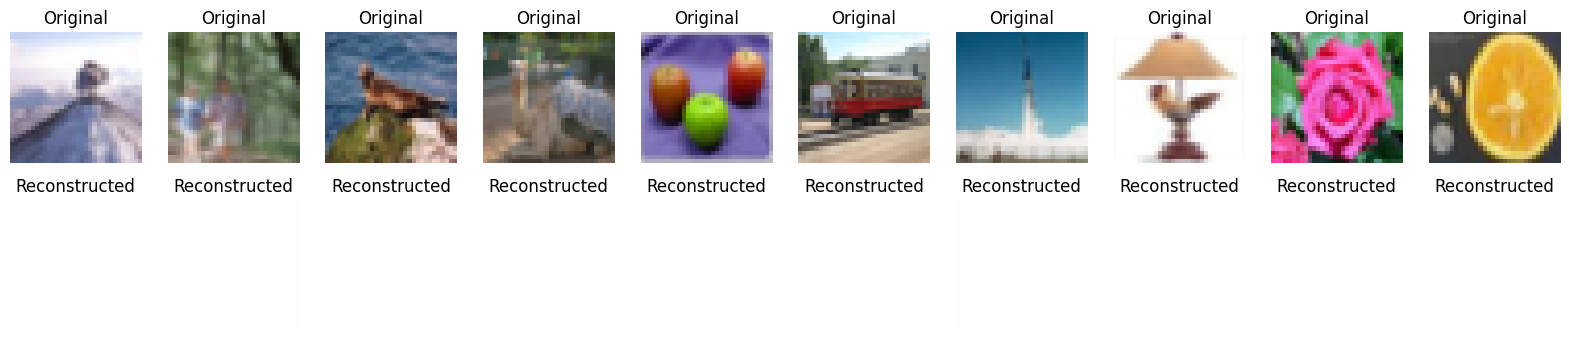

In [22]:
# Load the best model saved during training
best_autoencoder = load_model('part_2/best_autoencoder.keras')

results_df

# Get the reconstructed images from the autoencoder
reconstructed_images = best_autoencoder.predict(x_test_block1_norm)

# Plot original vs. reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_block1_norm[i])
    plt.gray()
    ax.set_title("Original")
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.gray()
    ax.set_title("Reconstructed")
    ax.axis('off')  

plt.show()
